In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns

sns.set(style='white', palette="Set2", color_codes=False)
#sns.set_style("ticks")

%matplotlib inline

In [2]:
db_path = 'data.db'
db = sqlite3.connect(db_path)

In [3]:
tasks = pd.read_sql_query('select executor, tasks_per_trial, returned, start_submit, connected_workers, tag from tasks', db)

In [4]:
tasks['completion time'] = tasks['returned'] - tasks['start_submit']
tasks['tasks/workers'] = tasks['tasks_per_trial'].map(str) + '/' + tasks['connected_workers'].map(str)

In [7]:
tasks['tag'].unique()

array(['sleep10000ms'], dtype=object)

In [11]:
sleeps.items()

dict_items([(10000, '10s sleep')])

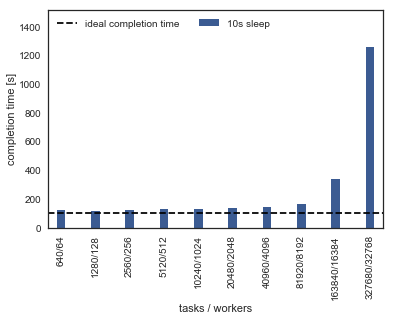

In [20]:
sleeps = {
    10000: '10s sleep'
}
fig, axes = plt.subplots(nrows=len(sleeps), sharex=True)

for i, (sleep, label) in enumerate(sleeps.items()):
    tag = 'sleep{}ms'.format(sleep)
    ax = axes if len(sleeps) == 1 else axes[i]

    df = tasks[(tasks['tag'] == tag)].groupby('tasks/workers', as_index=False)
    means = df.mean().sort_values('connected_workers')
    means.plot.bar('tasks/workers', 'completion time', label=label, ax=ax, color=sns.xkcd_rgb["denim blue"], width=0.25)
    
    ax.axhline(y=sleep / 1000 * 10, color='black', linestyle='dashed', label='ideal completion time')
    ax.set_ylim(0, max(means['completion time'] * 1.2))
    ax.legend(frameon=False, loc='upper left', ncol=2)
    ax.set_xlabel('')

ax = fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax.set_ylabel('completion time [s]', labelpad=10)
ax.set_xlabel('tasks / workers', labelpad=60)

plt.savefig('weak-scaling.pdf')